In [1]:
import pandas as pd
import numpy as np
import datetime

!pip install seaborn --upgrade

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Requirement already up-to-date: seaborn in c:\users\dheerajkumar_pittala\appdata\local\continuum\anaconda3\lib\site-packages (0.11.2)


In [2]:
df = pd.read_csv("car_data.csv", index_col = 'Unnamed: 0') # Importing the data
pd.set_option('display.max_columns', 500)

In [3]:
df

,Name,Transmission type,Variant,Mileage,Owned,Fuel type,City,Price
0,2017 Maruti Swift,Manual,VDI ABS Manual,"69,894 km",1st Owner,Diesel,Rohtak,"₹4,74,699"
1,2017 Maruti Wagon R 1.0,Manual,VXI Manual,"20,685 km",2nd Owner,Petrol,Rohtak,"₹3,56,699"
2,2019 Maruti Vitara Brezza,Manual,VDI Manual,"31,245 km",1st Owner,Diesel,Rohtak,"₹7,98,699"
3,2014 Maruti Swift,Manual,VDI Manual,"71,450 km",2nd Owner,Diesel,Rohtak,"₹3,30,599"
4,2013 Maruti Ertiga,Manual,VDI ABS Manual,"39,487 km",1st Owner,Diesel,Rohtak,"₹4,91,299"
...,...,...,...,...,...,...,...,...
5472,2016 Maruti Swift Dzire,Manual,VDI ABS Manual,"39,042 km",2nd Owner,Diesel,Zirakpur,"₹5,28,299"
5473,2013 Maruti Swift Dzire,Manual,ZDI Manual,"1,03,531 km",2nd Owner,Diesel,Zirakpur,"₹3,86,599"
5474,2016 Hyundai Grand i10,Manual,ASTA 1.2 (O) VTVT Manual,"22,387 km",1st Owner,Petrol,Zirakpur,"₹4,36,499"
5475,2016 Maruti Vitara Brezza,Manual,ZDI PLUS Manual,"69,990 km",1st Owner,Diesel,Zirakpur,"₹7,42,199"


In [4]:
df.replace(',','', regex=True, inplace=True) # Replacing the transmission type from Variant name as we already have it
df['Variant'] = df['Variant'].str.replace('Manual', '')
df['Variant'] = df['Variant'].str.replace('Automatic', '')

In [5]:
df.tail()

,Name,Transmission type,Variant,Mileage,Owned,Fuel type,City,Price
5472,2016 Maruti Swift Dzire,Manual,VDI ABS,39042 km,2nd Owner,Diesel,Zirakpur,₹528299
5473,2013 Maruti Swift Dzire,Manual,ZDI,103531 km,2nd Owner,Diesel,Zirakpur,₹386599
5474,2016 Hyundai Grand i10,Manual,ASTA 1.2 (O) VTVT,22387 km,1st Owner,Petrol,Zirakpur,₹436499
5475,2016 Maruti Vitara Brezza,Manual,ZDI PLUS,69990 km,1st Owner,Diesel,Zirakpur,₹742199
5476,2017 Hyundai Grand i10,Manual,ASTA 1.2 KAPPA VTVT,44147 km,1st Owner,Petrol,Zirakpur,₹494599


In [6]:
df.shape # We have 3483 rows and 8 coulmns

(5477, 8)

In [7]:
df.info() # Basic info about data types, we will need to convert some of them to integer

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5477 entries, 0 to 5476
Data columns (total 8 columns):
Name                 5477 non-null object
Transmission type    5323 non-null object
Variant              5477 non-null object
Mileage              5477 non-null object
Owned                5477 non-null object
Fuel type            5477 non-null object
City                 5477 non-null object
Price                5477 non-null object
dtypes: object(8)
memory usage: 385.1+ KB


In [8]:
df.nunique() # Unique values in each column

Name                  396
Transmission type       2
Variant               504
Mileage              2406
Owned                   4
Fuel type               4
City                   29
Price                2062
dtype: int64

In [9]:
df.isnull().sum() # Some value in transmission type are missing

Name                   0
Transmission type    154
Variant                0
Mileage                0
Owned                  0
Fuel type              0
City                   0
Price                  0
dtype: int64

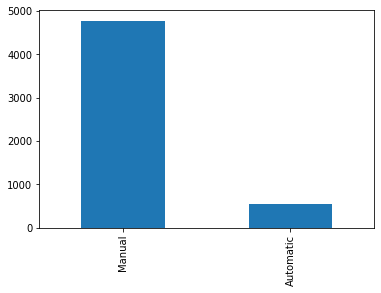

In [10]:
df['Transmission type'].value_counts().plot.bar() 

Most of the cars are Manual transmission.

In [11]:
df['Year'] = df.Name.str[:4] # Extracting year from name, and sorting it as integer
df['Year'] = df['Year'].astype(int)

In [12]:
df.Name = df.Name.str[4:] # Slicing the name so that it doesn't contain the year

In [13]:
df.Mileage = df.Mileage.str[:-3] # Removing ' km' form end of Mileage and converting it to integer
df['Mileage'] = df['Mileage'].astype(int)

In [14]:
df.Price = df.Price.str[1:] # Removing the rupee symbol '₹' from price, and changign type to integer
df ['Price'] = df['Price'].astype(int)

In [15]:
df['Manufacturer'] = df['Name'].str.split(' ').str[1] # Removing white space, and separating Manufacturer name form car name
df['Model'] = df['Name'].str.split(' ').str[2]

In [16]:
df.head() # Checking if everythgin worked right, it has.

,Name,Transmission type,Variant,Mileage,Owned,Fuel type,City,Price,Year,Manufacturer,Model
0,Maruti Swift,Manual,VDI ABS,69894,1st Owner,Diesel,Rohtak,474699,2017,Maruti,Swift
1,Maruti Wagon R 1.0,Manual,VXI,20685,2nd Owner,Petrol,Rohtak,356699,2017,Maruti,Wagon
2,Maruti Vitara Brezza,Manual,VDI,31245,1st Owner,Diesel,Rohtak,798699,2019,Maruti,Vitara
3,Maruti Swift,Manual,VDI,71450,2nd Owner,Diesel,Rohtak,330599,2014,Maruti,Swift
4,Maruti Ertiga,Manual,VDI ABS,39487,1st Owner,Diesel,Rohtak,491299,2013,Maruti,Ertiga


In [17]:
df['Transmission type'].value_counts() # Value counts of transmission

Manual       4777
Automatic     546
Name: Transmission type, dtype: int64

In [18]:
df['Owned'].value_counts() # Value counts of Owned

1st Owner    4427
2nd Owner     944
3rd Owner      93
4th Owner      13
Name: Owned, dtype: int64

In [19]:
df['Fuel type'].value_counts() # Value counts of Fuel type

Petrol          3594
Diesel          1815
Petrol + CNG      67
Petrol + LPG       1
Name: Fuel type, dtype: int64

In [20]:
df['City'].value_counts() # Value counts of City

Pune          434
Mumbai        434
Surat         301
Ahmedabad     301
Panipat       291
Bengaluru     278
Jaipur        273
Vadodara      254
Chennai       238
Delhi         223
Noida         223
Ghaziabad     223
Gurgaon       223
Faridabad     223
Rohtak        216
Meerut        212
Ludhiana      158
Zirakpur      158
Chandigarh    158
Kolkata       128
Indore        120
Kochi         116
Hyderabad      78
Nagpur         72
Nasik          59
Lucknow        36
Bhopal         26
Rajkot         18
Sonipat         3
Name: City, dtype: int64

In [21]:
df.describe() # Cheking some basic stats about our data

,Mileage,Price,Year
count,5477.000000,5.477000e+03,5477.000000
mean,44113.693445,6.002194e+05,2016.742560
std,33967.515072,3.287099e+05,2.262011
min,120.000000,1.263990e+05,2008.000000
25%,19041.000000,3.972990e+05,2015.000000
50%,36035.000000,5.177990e+05,2017.000000
75%,62462.000000,7.054990e+05,2018.000000
max,277105.000000,2.868999e+06,2021.000000


Minimum Mileage 120 km; Maximum Mileage 277105 km

Oldest car: 2008; Newest car: 2021

Minimum price: Rs. 126,000; Maximum price of car: Rs. 23,220,000

# Exploratory Data Analysis

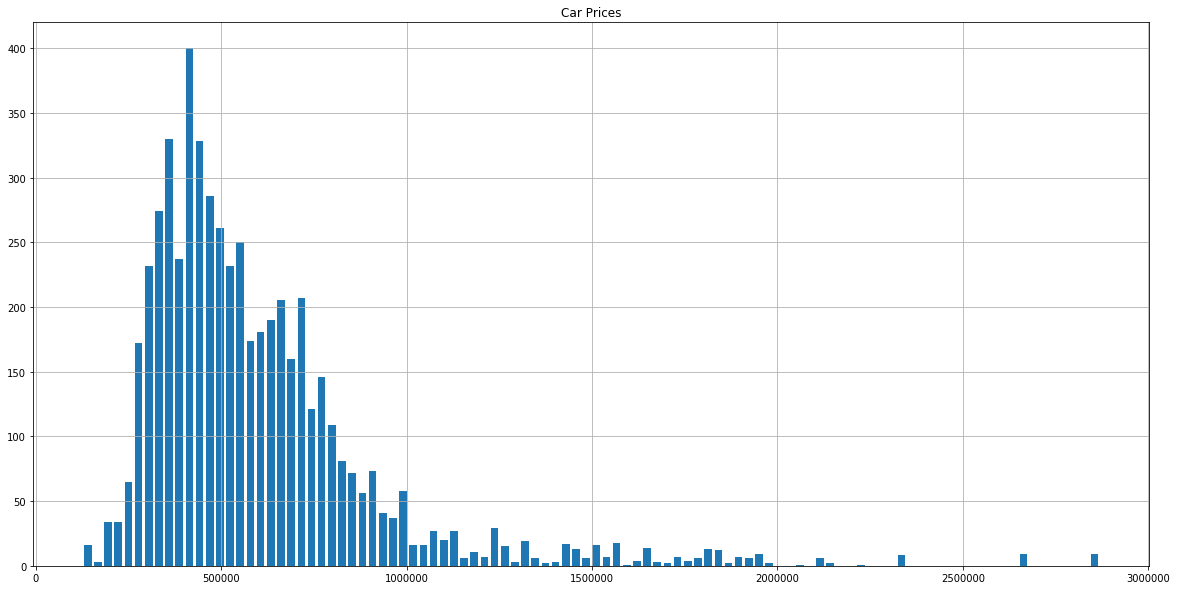

In [22]:
# Looking at distribution of selling price of car, which is our target variable.
# We can observe that the distribution is right skewed

df['Price'].hist(bins=100,figsize=(20,10),rwidth = 0.75)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Car Prices')
plt.show()

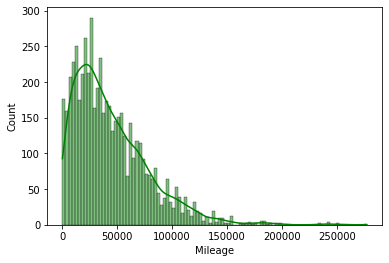

In [23]:
sns.histplot(df['Mileage'],bins = 100 , kde = True, color = 'green') # Most of the mileage of cars is less that 200,000 km

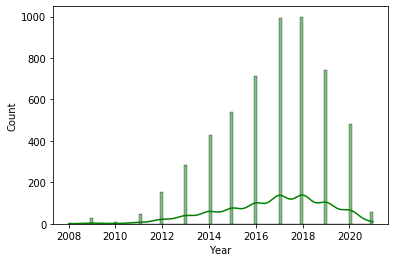

In [24]:
sns.histplot(df['Year'],bins = 100 , kde = True, color = 'green') # Most of the flight prices range from 2000-20000

We can see that most of the cars in this data were bought between 2015 and 2020

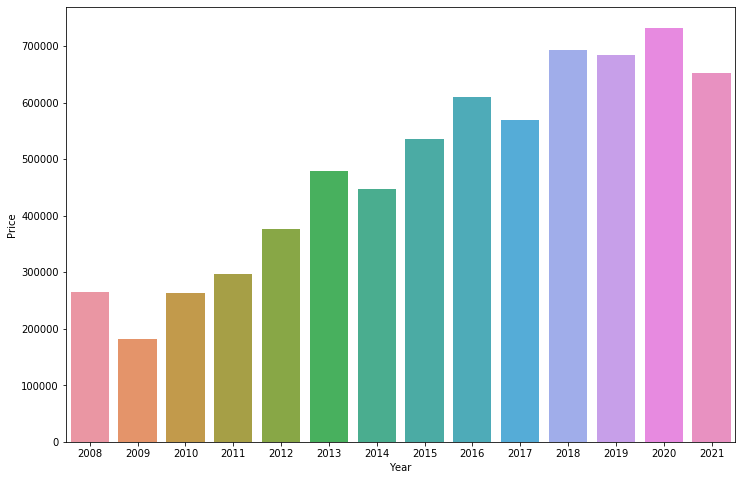

In [25]:
df_2 = df.groupby('Year').mean()
df_2.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Year', y='Price', data=df_2,ax=ax);

Average price of car vs year; we can see the average price of car increases if the car is not very old.

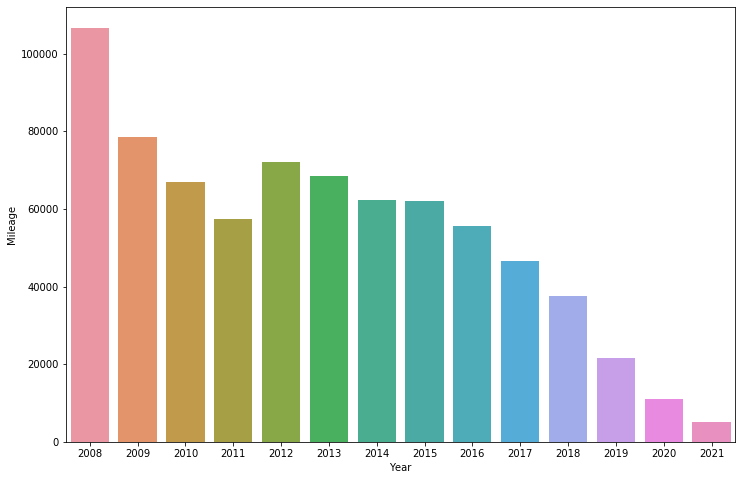

In [26]:
df_2 = df.groupby('Year').mean()
df_2.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Year', y='Mileage', data=df_2,ax=ax);

Average mileage in km on a car, based on the year the car was manufactured; we can observe that the mileage is more for older cars; as expected.

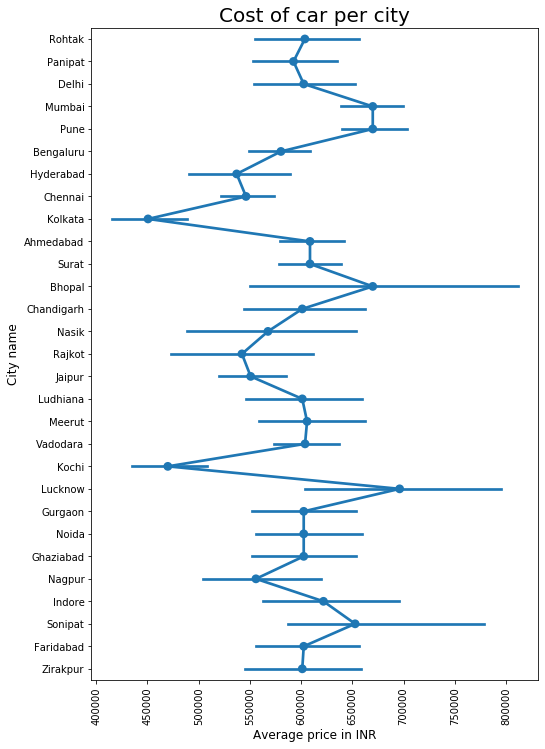

In [27]:
f,ax1 = plt.subplots(figsize = (8,12))
sns.pointplot(y = df.City, x = df['Price'], join=True, data= df )
plt.xticks(rotation = 90)
plt.title("Cost of car per city",{'fontsize':20})
plt.xlabel('Average price in INR',{'fontsize' : 'large'})
plt.ylabel('City name',{'fontsize':'large'})
plt.show()

Average price of car according to city in which it was listed. Bhopal has the most expensive cars and Kochi has the least expensive cars.

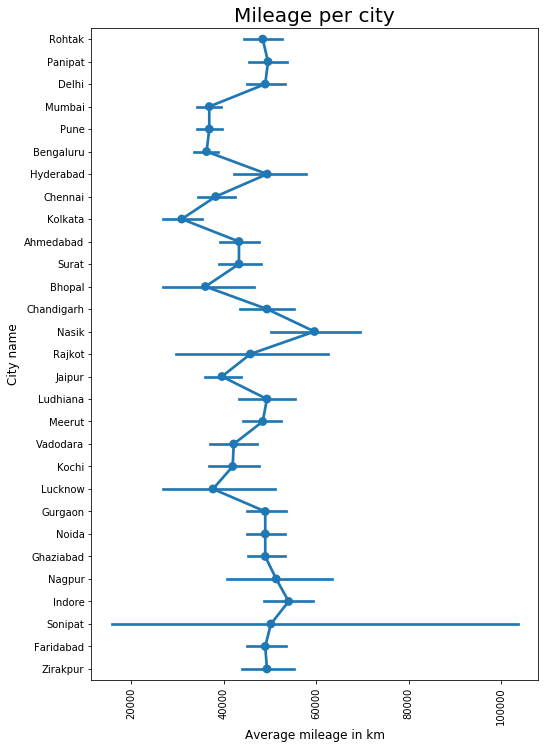

In [28]:
f,ax1 = plt.subplots(figsize = (8,12))
sns.pointplot(y = df.City, x = df['Mileage'], join=True, data= df )
plt.xticks(rotation = 90)
plt.title("Mileage per city",{'fontsize':20})
plt.xlabel('Average mileage in km',{'fontsize' : 'large'})
plt.ylabel('City name',{'fontsize':'large'})
plt.show()

Average mileage of car (in km) according to city in which it was listed. Ludhiiana has the most driven cars and Mysore has the least driven cars.

Checking the data for some cars

In [29]:
df[['Mileage']].idxmax() # Which df index has maximum mileage

Mileage    1892
dtype: int64

In [30]:
df.iloc[1879] # This car has max mileage

Name                  Maruti Alto K10
Transmission type              Manual
Variant                          VXI 
Mileage                         11402
Owned                       1st Owner
Fuel type                      Petrol
City                        Hyderabad
Price                          382799
Year                             2019
Manufacturer                   Maruti
Model                            Alto
Name: 1879, dtype: object

In [31]:
df[['Price']].idxmax() # Which df index has maximum price

Price    58
dtype: int64

In [32]:
df.iloc[72] # This car has max price

Name                  Maruti Swift
Transmission type           Manual
Variant                       VDI 
Mileage                     120326
Owned                    2nd Owner
Fuel type                   Diesel
City                        Rohtak
Price                       303999
Year                          2012
Manufacturer                Maruti
Model                        Swift
Name: 72, dtype: object

In [33]:
df[['Price']].idxmin() # Which df index has minimum price

Price    129
dtype: int64

In [34]:
df.iloc[36] # This car has min price

Name                  Maruti Vitara Brezza
Transmission type                   Manual
Variant                               ZDI 
Mileage                              35429
Owned                            1st Owner
Fuel type                           Diesel
City                                Rohtak
Price                               749599
Year                                  2017
Manufacturer                        Maruti
Model                               Vitara
Name: 36, dtype: object

In [35]:
df[['Mileage']].idxmin() # Which df index has minimum mileage

Mileage    1666
dtype: int64

In [36]:
df.iloc[1247] # This car has min mileage

Name                       Honda Brio
Transmission type              Manual
Variant              1.2 S MT I VTEC 
Mileage                         41406
Owned                       1st Owner
Fuel type                      Petrol
City                             Pune
Price                          367199
Year                             2015
Manufacturer                    Honda
Model                            Brio
Name: 1247, dtype: object

# Pre-processing data

In [37]:
df.nunique() # Now to simplify the data

Name                  108
Transmission type       2
Variant               504
Mileage              2406
Owned                   4
Fuel type               4
City                   29
Price                2062
Year                   14
Manufacturer           20
Model                  94
dtype: int64

In [38]:
df['Manufacturer'].value_counts() # We have a lot of manufacturers

Maruti        3048
Hyundai       1128
Ford           355
Honda          231
Toyota         176
Renault        122
Volkswagen      97
Tata            63
Mahindra        62
KIA             39
Skoda           26
Audi            26
Datsun          23
BMW             22
MG              20
Mercedes        18
Jeep            13
Nissan           4
Landrover        3
RENAULT          1
Name: Manufacturer, dtype: int64

Now I will simplify the engine size and convert it to a range, I will also convert various variants of engine to get a better description.

In [39]:
df.loc[df['Variant'].str.contains('LXI', case=False), 'Variant'] = 'Basic Petrol'
df.loc[df['Variant'].str.contains('VXI', case=False), 'Variant'] = 'Middle Petrol'
df.loc[df['Variant'].str.contains('ZXI', case=False), 'Variant'] = 'Top Petrol'

df.loc[df['Variant'].str.contains('VDI', case=False), 'Variant'] = 'Basic Diesel'
df.loc[df['Variant'].str.contains('VDI', case=False), 'Variant'] = 'Middle Diesel'
df.loc[df['Variant'].str.contains('ZDI', case=False), 'Variant'] = 'Top Diesel'

df.loc[df['Variant'].str.contains('LUXURY', case=False), 'Variant'] = 'Luxury'

df.loc[df['Variant'].str.contains('1.0', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('1.1', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('1.2', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('1.3', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('1.4', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('1.5', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('1.6', case=False), 'Variant'] = '1.5-2.0 Liter'
df.loc[df['Variant'].str.contains('1.7', case=False), 'Variant'] = '1.5-2.0 Liter'
df.loc[df['Variant'].str.contains('1.8', case=False), 'Variant'] = '1.5-2.0 Liter'
df.loc[df['Variant'].str.contains('1.9', case=False), 'Variant'] = '1.5-2.0 Liter'
df.loc[df['Variant'].str.contains('2.0', case=False), 'Variant'] = '1.5-2.0 Liter'
df.loc[df['Variant'].str.contains('2.1', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.2', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.3', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.4', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.5', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.6', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.7', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.8', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.9', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('3.0', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('3.1', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('3.2', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('3.3', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('3.4', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('3.5', case=False), 'Variant'] = '2.0+ Liter'

df.loc[df['Variant'].str.contains('5 STR WITH AC PLUSHTR', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('RXL', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('V MT PETROL', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('ERA PLUS', case=False), 'Variant'] = '1.0-1.5 Liter'

In [40]:
df.loc[df.groupby('Variant').Variant.transform('count').lt(20), 'Variant'] = 'Other' 

# Combining variants as Other which have less than 20 value counts to simplify the data

In [41]:
df['Variant'].value_counts()

1.0-1.5 Liter    2240
Middle Petrol     898
Basic Diesel      561
Other             524
Basic Petrol      484
Top Diesel        280
1.5-2.0 Liter     238
2.0+ Liter        128
Top Petrol        124
Name: Variant, dtype: int64

In [42]:
df['Model'].value_counts() # We have 91 different car models

Alto        768
Swift       715
Baleno      372
Vitara      348
Ecosport    305
           ... 
Octavia       1
Terrano       1
Sunny         1
CRV           1
ALTROZ        1
Name: Model, Length: 94, dtype: int64

In [43]:
df['Name'].value_counts() # We have 107 different names

 Maruti Swift            531
 Maruti Baleno           372
 Maruti Vitara Brezza    348
 Maruti Alto 800         323
 Ford Ecosport           305
                        ... 
 Tata ALTROZ               1
 Honda CRV                 1
 Nissan Terrano            1
 Maruti Zen Estilo         1
 Datsun Go Plus            1
Name: Name, Length: 108, dtype: int64

In [44]:
df.drop(['Name'], axis = 1, inplace = True) # Dropping the name columns as I have already separated it into 'Name' and 'Model'

# EDA

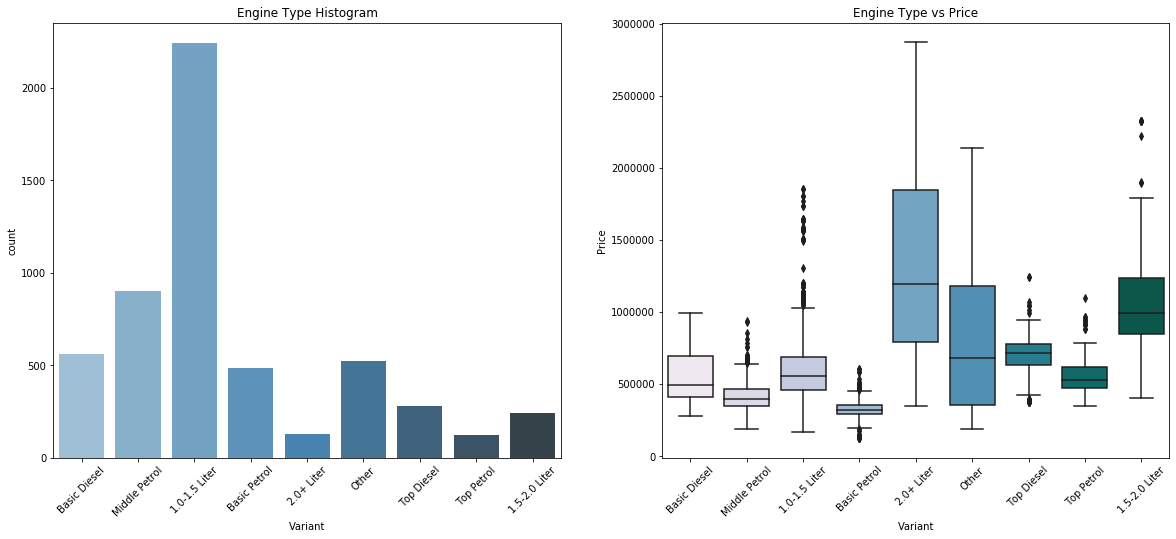

In [45]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
plt.xticks(rotation=45)
sns.countplot(df.Variant, palette=("Blues_d"))
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=df.Variant, y=df.Price, palette=("PuBuGn"))

plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Count plot and price plot according to the cars engine variant

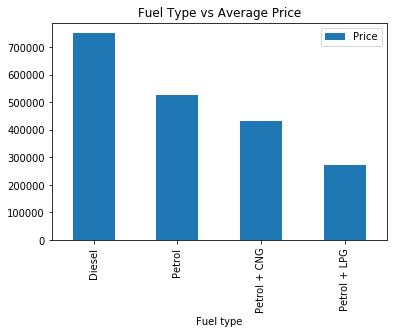

In [46]:
df_fuel = pd.DataFrame(df.groupby(['Fuel type'])['Price'].mean().sort_values(ascending = False))
df_fuel.plot.bar()
plt.ticklabel_format(style='plain', axis='y')
plt.title('Fuel Type vs Average Price')
plt.show()

Average price of car with respect to the fuel type. Diesel is most evpensive, then petrol, least expensive is Petrol + LPG

In [47]:
df.head()

,Transmission type,Variant,Mileage,Owned,Fuel type,City,Price,Year,Manufacturer,Model
0,Manual,Basic Diesel,69894,1st Owner,Diesel,Rohtak,474699,2017,Maruti,Swift
1,Manual,Middle Petrol,20685,2nd Owner,Petrol,Rohtak,356699,2017,Maruti,Wagon
2,Manual,Basic Diesel,31245,1st Owner,Diesel,Rohtak,798699,2019,Maruti,Vitara
3,Manual,Basic Diesel,71450,2nd Owner,Diesel,Rohtak,330599,2014,Maruti,Swift
4,Manual,Basic Diesel,39487,1st Owner,Diesel,Rohtak,491299,2013,Maruti,Ertiga


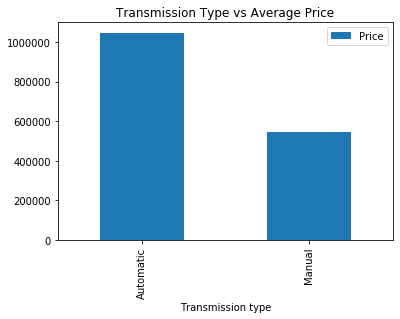

In [48]:
df_trans = pd.DataFrame(df.groupby(['Transmission type'])['Price'].mean().sort_values(ascending = False))
df_trans.plot.bar()
plt.ticklabel_format(style='plain', axis='y')
plt.title('Transmission Type vs Average Price')
plt.show()

As expected cars which have automatic transmission are on average priced above Rs. 80,000 and cars which have manual transmission are on average price around Rs 50,000

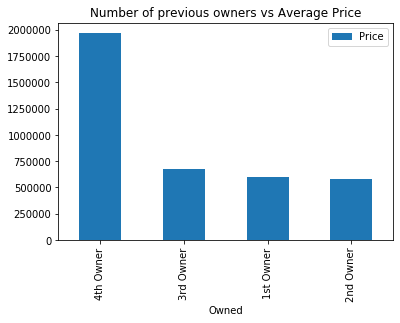

In [49]:
df_ownd = pd.DataFrame(df.groupby(['Owned'])['Price'].mean().sort_values(ascending = False))
df_ownd.plot.bar()
plt.ticklabel_format(style='plain', axis='y')
plt.title('Number of previous owners vs Average Price')
plt.show()

We can observe that as number of owners go up, the average price of car decreases, this is what one would expect.

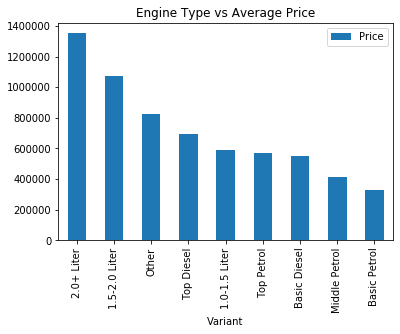

In [50]:
df_vrnt = pd.DataFrame(df.groupby(['Variant'])['Price'].mean().sort_values(ascending = False))
df_vrnt.plot.bar()

plt.title('Engine Type vs Average Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

We can see that 2 liter engine is the most common engine size.

# Multi variate analysis

<Figure size 1080x1080 with 0 Axes>

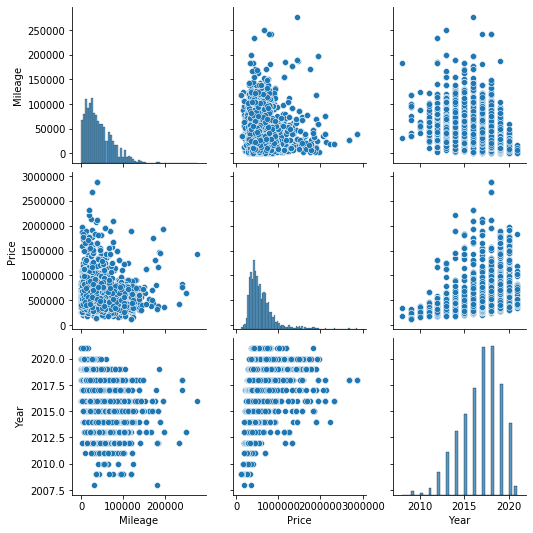

In [51]:
plt.figure(figsize=(15,15))
sns.pairplot(df)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

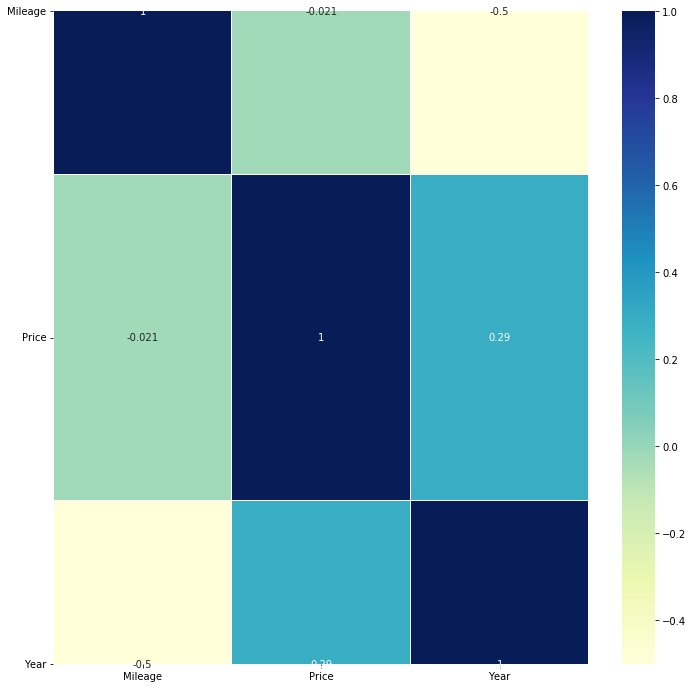

In [52]:
plt.figure(figsize=(12,12)) # Co-relation heat map
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0); # Checkign co-relation

In [53]:
df.loc[df.groupby('Model').Variant.transform('count').lt(20), 'Variant'] = 'Other'  
# If less that 20 count, Model is renamed to 'Other'

In [54]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the df

df = dummies('Transmission type',df)
df = dummies('Variant',df)
df = dummies('Owned',df)
df = dummies('Fuel type',df)
df = dummies('City',df)
df = dummies('Manufacturer',df)
df = dummies('Model',df)

In [55]:
df.head() # Dummy variables have been created

,Mileage,Price,Year,Manual,1.5-2.0 Liter,2.0+ Liter,Basic Diesel,Basic Petrol,Middle Petrol,Other,Top Diesel,Top Petrol,2nd Owner,3rd Owner,4th Owner,Petrol,Petrol + CNG,Petrol + LPG,Bengaluru,Bhopal,Chandigarh,Chennai,Delhi,Faridabad,Ghaziabad,Gurgaon,Hyderabad,Indore,Jaipur,Kochi,Kolkata,Lucknow,Ludhiana,Meerut,Mumbai,Nagpur,Nasik,Noida,Panipat,Pune,Rajkot,Rohtak,Sonipat,Surat,Vadodara,Zirakpur,BMW,Datsun,Ford,Honda,Hyundai,Jeep,KIA,Landrover,MG,Mahindra,Maruti,Mercedes,Nissan,RENAULT,Renault,Skoda,Tata,Toyota,Volkswagen,A,A3,A4,ALTROZ,AURA,Alto,Amaze,Ameo,BR-V,Baleno,Benz,Bolero,Brio,CRV,Camry,Captur,Celerio,Ciaz,City,Civic,Compass,Corolla,Creta,Duster,Dzire,Ecosport,Eeco,Elite,Endeavour,Eon,Ertiga,Etios,FREESTYLE,Figo,Fortuner,Freelander,GRAND,Glanza,Go,Grand,HECTOR,Harrier,Hexa,IGNIS,Innova,Jazz,KAROQ,Kiger,Kuv100,Kwid,MARAZZO,Micra,Mobilio,NEW,NEXON,Nano,New,OMNI,Octavia,Polo,Q3,Rapid,Redi,Ritz,S,SELTOS,Santro,Scorpio,Sunny,Superb,Swift,TIGOR,TRIBER,TUV300,Terrano,Thar,Tiago,Tucson,VENUE,Vento,Verna,Vitara,WR-V,Wagon,X1,XL6,XUV,XUV500,Xcent,YARIS,Zen,i10,i20
0,69894,474699,2017,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20685,356699,2017,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,31245,798699,2019,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,71450,330599,2014,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,39487,491299,2013,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
df.shape # We have 3483 rows, and 150 coulmns after creating dummy variables

(5477, 158)

Skew of Pirce: 2.5520484269275756


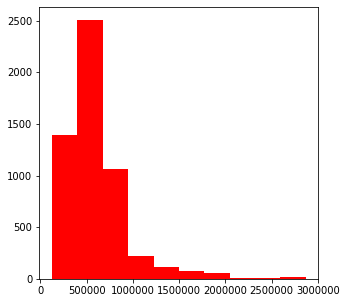

In [57]:
fig = plt.figure(figsize=(5,5))

print ("Skew of Pirce:", df.Price.skew())
plt.hist(df.Price,  color='red')
plt.show() # Checking skew of target variable

Skew of Log-Transformed Price: 0.5222401737362218


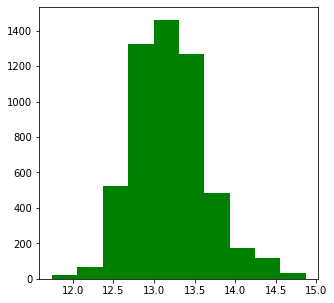

In [58]:
fig = plt.figure(figsize=(5,5))

print ("Skew of Log-Transformed Price:", np.log1p(df.Price).skew())
plt.hist(np.log1p(df.Price), color='green')
plt.show() # Fixing the skew by taking log

Skew of Mileage 1.3948558070342654


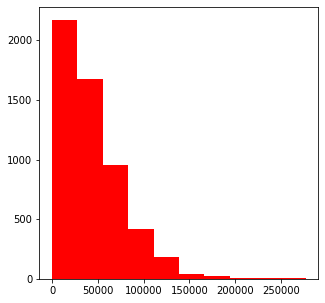

In [59]:
fig = plt.figure(figsize=(5,5))

print ("Skew of Mileage", df.Mileage.skew())
plt.hist(df.Mileage,  color='red')
plt.show() # Checking skew of variable

Skew of Log-Transformed Mileage -1.703346258624965


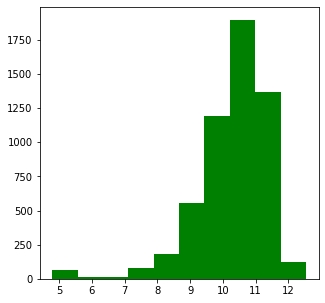

In [60]:
fig = plt.figure(figsize=(5,5))

print ("Skew of Log-Transformed Mileage", np.log1p(df.Mileage).skew())
plt.hist(np.log1p(df.Mileage), color='green')
plt.show() # Reducting the skew by taking log

# Model building phase

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, cross_val_predict
import sklearn.metrics as sm
from math import e
# Importing useful libraries

In [62]:
df.head()

,Mileage,Price,Year,Manual,1.5-2.0 Liter,2.0+ Liter,Basic Diesel,Basic Petrol,Middle Petrol,Other,Top Diesel,Top Petrol,2nd Owner,3rd Owner,4th Owner,Petrol,Petrol + CNG,Petrol + LPG,Bengaluru,Bhopal,Chandigarh,Chennai,Delhi,Faridabad,Ghaziabad,Gurgaon,Hyderabad,Indore,Jaipur,Kochi,Kolkata,Lucknow,Ludhiana,Meerut,Mumbai,Nagpur,Nasik,Noida,Panipat,Pune,Rajkot,Rohtak,Sonipat,Surat,Vadodara,Zirakpur,BMW,Datsun,Ford,Honda,Hyundai,Jeep,KIA,Landrover,MG,Mahindra,Maruti,Mercedes,Nissan,RENAULT,Renault,Skoda,Tata,Toyota,Volkswagen,A,A3,A4,ALTROZ,AURA,Alto,Amaze,Ameo,BR-V,Baleno,Benz,Bolero,Brio,CRV,Camry,Captur,Celerio,Ciaz,City,Civic,Compass,Corolla,Creta,Duster,Dzire,Ecosport,Eeco,Elite,Endeavour,Eon,Ertiga,Etios,FREESTYLE,Figo,Fortuner,Freelander,GRAND,Glanza,Go,Grand,HECTOR,Harrier,Hexa,IGNIS,Innova,Jazz,KAROQ,Kiger,Kuv100,Kwid,MARAZZO,Micra,Mobilio,NEW,NEXON,Nano,New,OMNI,Octavia,Polo,Q3,Rapid,Redi,Ritz,S,SELTOS,Santro,Scorpio,Sunny,Superb,Swift,TIGOR,TRIBER,TUV300,Terrano,Thar,Tiago,Tucson,VENUE,Vento,Verna,Vitara,WR-V,Wagon,X1,XL6,XUV,XUV500,Xcent,YARIS,Zen,i10,i20
0,69894,474699,2017,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20685,356699,2017,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,31245,798699,2019,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,71450,330599,2014,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,39487,491299,2013,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
X=df.drop(['Price'], axis = 1, inplace = False) # Training variables
y=df['Price'] # Testing variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (4381, 157)
Y Train Shape  (4381,)
X Test Shape  (1096, 157)
Y Test Shape  (1096,)


# Decision tree regressor

In [64]:
dtr = DecisionTreeRegressor(random_state=5)
dtr.fit(X_train, y_train)
y_pred_dt = dtr.predict(X_test)
dtr.score(X_test, y_test)

0.9617055754619144

In [65]:
scr = cross_val_score(dtr, X,y, cv=4)
print(scr.mean())

0.9035074894367207


In [66]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_dt), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_dt), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_dt), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_dt), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_dt), 2))

Mean absolute error = 24779.65
Mean squared error = 4311144680.66
Median absolute error = 0.0
Explain variance score = 0.96
R2 score = 0.96


# Random forest regression

In [67]:
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test, y_test)

0.9715350450192743

In [68]:
scr = cross_val_score(rfr, X,y, cv=4)
print(scr.mean())

0.927041965155807


In [69]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_rfr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_rfr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_rfr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_rfr), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_rfr), 2))

Mean absolute error = 26721.04
Mean squared error = 3204553684.53
Median absolute error = 8893.5
Explain variance score = 0.97
R2 score = 0.97


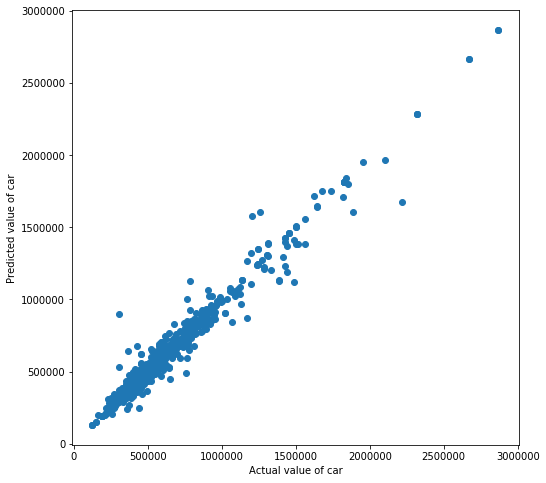

In [70]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred_rfr)
plt.xlabel("Actual value of car")
plt.ylabel("Predicted value of car")
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

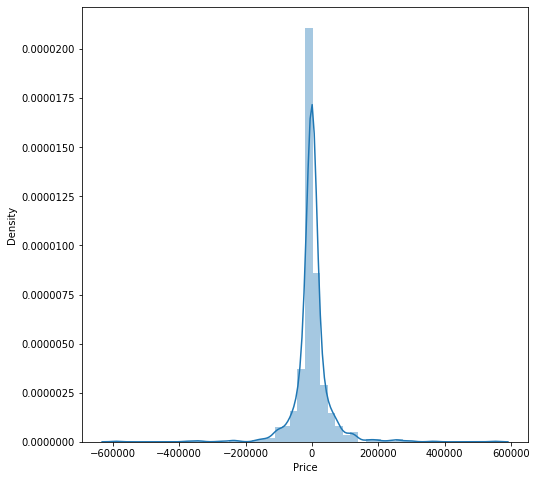

In [71]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-y_pred_rfr)

# Taking log of Price, Mileage and min-max of year data

In [72]:
df['Price'] = np.log(df['Price'])
df['Mileage'] = np.log(df['Mileage'])
df['Year']=(df['Year']-df['Year'].min())/(df['Year'].max()-df['Year'].min())

In [73]:
X=df.drop(['Price'], axis = 1, inplace = False)
y=df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (4381, 157)
Y Train Shape  (4381,)
X Test Shape  (1096, 157)
Y Test Shape  (1096,)


# Random forest regression

In [74]:
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test, y_test)

0.9661812646769377

In [75]:
scr = cross_val_score(rfr, X,y, cv=4)
print(scr.mean())

0.9270210511225838


# Decision tree regressor

In [76]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=5)
dtr.fit(X_train, y_train)
y_pred_dt = dtr.predict(X_test)
dtr.score(X_test, y_test)

0.9456529813830211

In [77]:
scr = cross_val_score(dtr, X,y, cv=4)
print(scr.mean())

0.9001138255571381


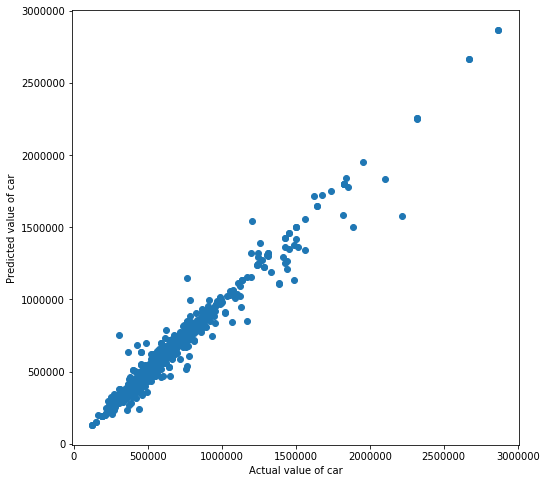

In [78]:
plt.figure(figsize=(8,8)) # Scatter plot of predicted vs actual values
plt.scatter(e**(y_test),e**(y_pred_rfr))
plt.xlabel("Actual value of car")
plt.ylabel("Predicted value of car")
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

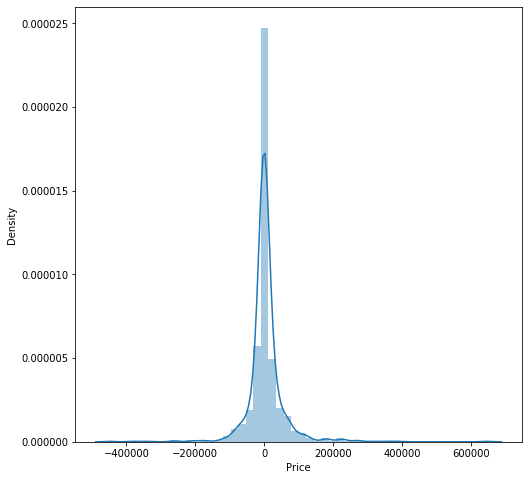

In [79]:
plt.figure(figsize=(8,8))
sns.distplot(e**y_test-e**y_pred_rfr) # As I took log before, re-converting the values to real prices

# Support vector regression

In [80]:
svr = SVR().fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
svr.score(X_test, y_test)

0.8677794525131138

In [81]:
scr = cross_val_score(svr, X,y, cv=5)
print(scr.mean())

0.8576922259537942


# Hyper paramter tuning

I will be performing hyper parameter tuning on the random forest regressor model, as it gave the best performance.

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
parameters = { 'n_estimators' : [100,150],
               'min_samples_leaf' : [1,2], 
              'min_samples_split': [2,3],
              'criterion': ['mse','mae']
}

In [84]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [85]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 150]})

In [86]:
GCV.best_params_

{'criterion': 'mse',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

Training model according to the best parameters

In [87]:
mod = RandomForestRegressor(min_samples_leaf= 1, min_samples_split =2, n_estimators = 150, criterion='mse')
mod.fit(X_train,y_train)
pred = mod.predict(X_test)
mod.score(X_test,y_test)

0.9657742606526253

In [88]:
scr = cross_val_score(mod, X,y, cv=4)
print(scr.mean())

0.9278739517943783


As we can observe hyper parameter tuning improved the r^2 score to 0.927 which is good.

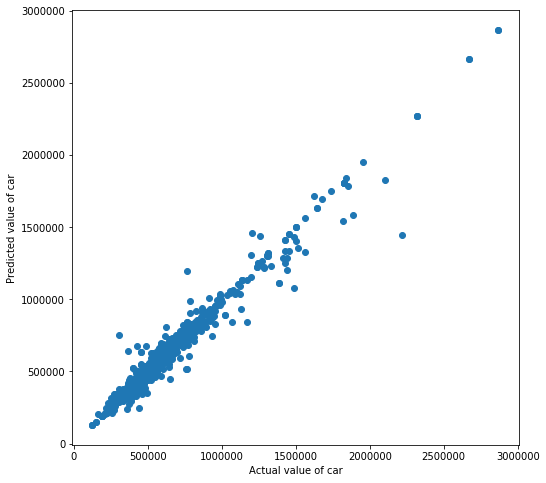

In [89]:
plt.figure(figsize=(8,8))
plt.scatter(e**y_test,e**pred)
plt.xlabel("Actual value of car")
plt.ylabel("Predicted value of car")
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

Scatter plot of predicted vs actual values, we can se ethat there are some outliers, but most of the values lie in a stright line at 45deg which is optimal.

We also got a much tighter fir near 0 deviation which means our model is performing well.

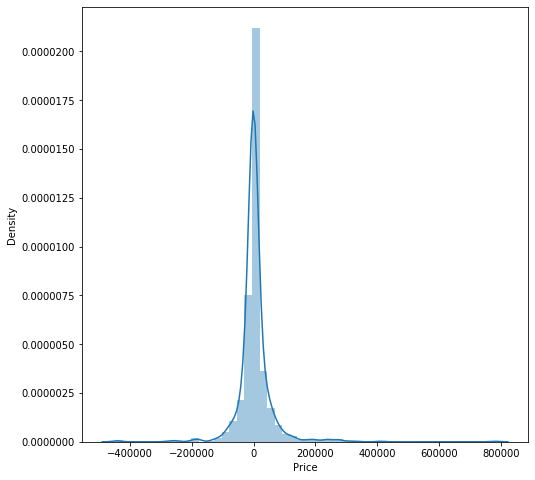

In [90]:
plt.figure(figsize=(8,8))
sns.distplot(e**y_test-e**pred) # As I took log before, re-converting the values to real prices

# Checking the Concordance index

In [91]:
!pip install lifelines
from lifelines.utils import concordance_index
print(f'Concordance index: {concordance_index(y_test, pred)}')

Concordance index: 0.9521745439019875


We got Concordance index: 0.9521745439019875, which is a very good value. and it mease that the model is performing great.

# Saving the model

In [92]:
import joblib
joblib.dump(mod,"CarPricePred.pkl")

['CarPricePred.pkl']